#**Machine Learning Project**

***Title: Predicting ICU admission of confirmed COVID-19 cases***

The COVID-19 pandemic has shown us the
unpreparedness of our current healthcare system and
services. We need to optimize the allocation of medical
resources to maximize the utilization of resources. We are
preparing this Machine Learning model based on the
clinical data of confirmed COVID-19 cases. This will help
us to predict the need of ICU for a patient in advance. By
this information hospitals can plan the flow of operations
and take critical decisions like shifting patient to another
hospital or arrangement of resources within the time so
that the lives of patients can be saved.



##Libraries and Packages
List of all the packages that is used in the notebook

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA 

pd.set_option('display.max_columns', None)


Downloading Dataset


In [2]:
!wget -O "Kaggle_Sirio_Libanes_ICU_Prediction.xlsx" "https://drive.google.com/uc?export=download&id=1_shaH6SQajy1zrnALzim9jGaRmF3PLIn"

--2020-12-20 22:41:48--  https://drive.google.com/uc?export=download&id=1_shaH6SQajy1zrnALzim9jGaRmF3PLIn
Resolving drive.google.com (drive.google.com)... 108.177.11.100, 108.177.11.113, 108.177.11.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.11.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rjbv35t6bjnqa6t8rv92guj4pokeirq3/1608504075000/04245606460885426616/*/1_shaH6SQajy1zrnALzim9jGaRmF3PLIn?e=download [following]
--2020-12-20 22:41:49--  https://doc-0c-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rjbv35t6bjnqa6t8rv92guj4pokeirq3/1608504075000/04245606460885426616/*/1_shaH6SQajy1zrnALzim9jGaRmF3PLIn?e=download
Resolving doc-0c-80-docs.googleusercontent.com (doc-0c-80-docs.googleusercontent.com)... 142.250.97.132, 2607:f8b0:400c:c18::84
Connecting to doc-0c-80-docs.googleusercontent.com (doc-0c

##Reading Dataset
Reading the dataset from the given CSV file.

In [3]:
data = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

##Data Pre-Processing
Converting the data into usable format.
Following modifications has been done to the data to get most out of it:
1. Binary hotcoding to convert not float columns.
2. Marking Window 0-2 as 1 if the patient was admitted to ICU in any of the future windows. 
3. Removing all the records of the windows in which patients were actually admitted to the ICU (windows with ICU label 1 before the step 2).
4. Filling the NaN values of window 0-2 with the help of mean of values in all the windows of that patient.
5. Removing all the rows still having NaN values.


In [4]:
print(data.dtypes)
data.select_dtypes(object)

PATIENT_VISIT_IDENTIFIER        int64
AGE_ABOVE65                     int64
AGE_PERCENTIL                  object
GENDER                          int64
DISEASE GROUPING 1            float64
                               ...   
RESPIRATORY_RATE_DIFF_REL     float64
TEMPERATURE_DIFF_REL          float64
OXYGEN_SATURATION_DIFF_REL    float64
WINDOW                         object
ICU                             int64
Length: 231, dtype: object


,AGE_PERCENTIL,WINDOW
0,60th,0-2
1,60th,2-4
2,60th,4-6
3,60th,6-12
4,60th,ABOVE_12
...,...,...
1920,50th,0-2
1921,50th,2-4
1922,50th,4-6
1923,50th,6-12


In [5]:
without_ICU_column = data.drop('ICU', axis = 1)       #seperating the ICU lable column
ICU_column = data['ICU']
colums_to_convert = data.select_dtypes(object).columns   #finding columns that are not of type float or int
colums_to_convert

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')

In [6]:
without_ICU_column = pd.get_dummies(without_ICU_column, columns = colums_to_convert)      #performing hotcoding
without_ICU_column.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
data_expand = pd.concat([without_ICU_column, ICU_column], axis = 1)         #adding the ICU column again at the last position
data_expand.head(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,ICU
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
column_names = data_expand.columns
arr = data_expand.to_numpy()
print(arr)
i=0
ICU_admitted_rows = []
while(i<len(arr)):            #loop to record the rows in which patient is admitted to the ICU and adding 1 label to the previous rows.
  for j in range(5):
    if(arr[i+j][-1]==1):
      for k in range(j):
        arr[i+k][-1]=1
      for toremove in range(i+j,i+5):
        ICU_admitted_rows.append(toremove)
      break
  i+=5
print(ICU_admitted_rows)
deletedcount = 0
for rowToRemove in ICU_admitted_rows:             #removing the rows in which patient was admitted to the ICU
  arr = np.delete(arr, rowToRemove-deletedcount, axis=0)
  deletedcount+=1
df = pd.DataFrame(arr, columns = column_names)
df.head(10)

[[  0.   1.   0. ...   0.   0.   0.]
 [  0.   1.   0. ...   0.   0.   0.]
 [  0.   1.   0. ...   0.   0.   0.]
 ...
 [384.   0.   1. ...   0.   0.   0.]
 [384.   0.   1. ...   1.   0.   0.]
 [384.   0.   1. ...   0.   1.   0.]]
[4, 5, 6, 7, 8, 9, 14, 58, 59, 69, 72, 73, 74, 79, 85, 86, 87, 88, 89, 92, 93, 94, 99, 122, 123, 124, 135, 136, 137, 138, 139, 141, 142, 143, 144, 147, 148, 149, 157, 158, 159, 183, 184, 187, 188, 189, 192, 193, 194, 197, 198, 199, 202, 203, 204, 205, 206, 207, 208, 209, 222, 223, 224, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 261, 262, 263, 264, 268, 269, 270, 271, 272, 273, 274, 278, 279, 310, 311, 312, 313, 314, 317, 318, 319, 321, 322, 323, 324, 338, 339, 343, 344, 349, 354, 367, 368, 369, 387, 388, 389, 394, 397, 398, 399, 408, 409, 411, 412, 413, 414, 424, 425, 426, 427, 428, 429, 432, 433, 434, 436, 437, 438, 439, 443, 444, 448, 449, 450, 451, 452, 453, 454, 474, 484, 498, 499, 501, 502, 503, 504, 512, 513, 514, 516, 517, 518, 519, 520, 521, 522, 

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,ICU
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [9]:
#Filling missing values
pd.options.mode.chained_assignment = None 
edited_dfs_list = []
max_patient_id = df['PATIENT_VISIT_IDENTIFIER'].max()
for i in range(int(max_patient_id)):                      #keeping only the first window that is 0-2 for every patient and filling NaN values with mean of all windows
  tempdf = df[df['PATIENT_VISIT_IDENTIFIER']==i]
  if(len(tempdf)!=0):
    tempdf.fillna(tempdf.mean(), inplace=True)
    tempdf = tempdf.iloc[[0]]
    edited_dfs_list.append(tempdf)

  
final_data = pd.concat(edited_dfs_list)
final_data.head(30)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,ICU
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1

In [10]:
final_data = final_data.drop(['GENDER','PATIENT_VISIT_IDENTIFIER','WINDOW_0-2',	'WINDOW_2-4',	'WINDOW_4-6',	'WINDOW_6-12',	'WINDOW_ABOVE_12'],axis = 1)
final_data.head()

,AGE_ABOVE65,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,ICU
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,-0.93895

In [11]:
final_data.describe()

,AGE_ABOVE65,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,ICU
count,352.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,334.000000,334.000000,334.000000,334.000000,334.0,334.000000,334.000000,334.000000,334.000000,334.0,334.000000,334.000000,334.000000,334.000000,3

In [12]:
final_data = final_data.dropna(axis = 0)            #Now we must have to drop the rows having nan values as there is no data in any window to fill it.

##Data Analysis
Visualising the pre preoessed data and trying to get the intution about different characterstics.

In [13]:
final_data.describe()

,AGE_ABOVE65,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,ICU
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.0,293.000000,293.000000,293.000000,293.000000,293.0,293.000000,293.000000,293.000000,293.000000,2

Total Patients after pre processing:  293
Distribution of ICU admissions
Patients who were not admitted to ICU:  188
Patients who were admitted to ICU:  105


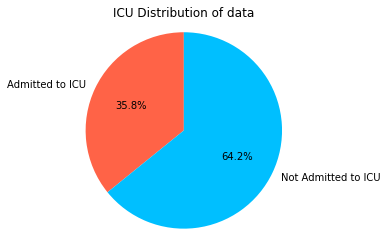

In [14]:
ICU_admission_distribution = final_data['ICU'].value_counts()
print("Total Patients after pre processing: ", sum(ICU_admission_distribution))
print("Distribution of ICU admissions")
print("Patients who were not admitted to ICU: ",ICU_admission_distribution[0])
print("Patients who were admitted to ICU: ",ICU_admission_distribution[1])
labels= ['Admitted to ICU', 'Not Admitted to ICU']
colors=['tomato', 'deepskyblue']
sizes= [ICU_admission_distribution[1], ICU_admission_distribution[0]]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.title("ICU Distribution of data")
plt.axis('equal')
plt.show()

Age Distribution
Patients below age 65:  172
Patients above age 65:  121


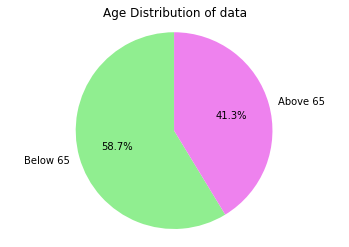

In [15]:
Age_distribution = final_data['AGE_ABOVE65'].value_counts()
print("Age Distribution")
print("Patients below age 65: ",Age_distribution[0])
print("Patients above age 65: ",Age_distribution[1])
labels= ['Below 65', 'Above 65']
colors=['lightgreen', 'violet']
sizes= [Age_distribution[0], Age_distribution[1]]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Age Distribution of data")
plt.show()



Age Distribution
Patients below age 65:  45
Patients above age 65:  60


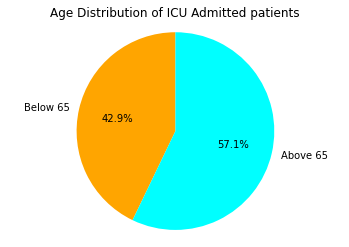

[[36, 38, 34, 33, 30, 28, 30, 26, 20, 18], [6, 7, 11, 8, 13, 11, 13, 14, 12, 10]]


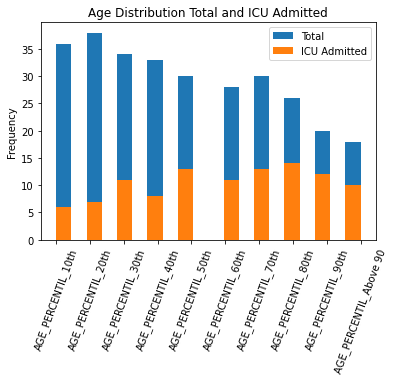

In [16]:
ICU_Admitted_data = final_data[final_data['ICU']==1]
Age_distribution = ICU_Admitted_data['AGE_ABOVE65'].value_counts()
print("Age Distribution")
print("Patients below age 65: ",Age_distribution[0])
print("Patients above age 65: ",Age_distribution[1])
labels= ['Below 65', 'Above 65']
colors=['orange', 'cyan']
sizes= [Age_distribution[0], Age_distribution[1]]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Age Distribution of ICU Admitted patients")
plt.show()

x = [[],[]]
x[0].append(final_data['AGE_PERCENTIL_10th'].value_counts()[1])
x[0].append(final_data['AGE_PERCENTIL_20th'].value_counts()[1])
x[0].append(final_data['AGE_PERCENTIL_30th'].value_counts()[1])
x[0].append(final_data['AGE_PERCENTIL_40th'].value_counts()[1])
x[0].append(final_data['AGE_PERCENTIL_50th'].value_counts()[1])
x[0].append(final_data['AGE_PERCENTIL_60th'].value_counts()[1])
x[0].append(final_data['AGE_PERCENTIL_70th'].value_counts()[1])
x[0].append(final_data['AGE_PERCENTIL_80th'].value_counts()[1])
x[0].append(final_data['AGE_PERCENTIL_90th'].value_counts()[1])
x[0].append(final_data['AGE_PERCENTIL_Above 90th'].value_counts()[1])

x[1].append(ICU_Admitted_data['AGE_PERCENTIL_10th'].value_counts()[1])
x[1].append(ICU_Admitted_data['AGE_PERCENTIL_20th'].value_counts()[1])
x[1].append(ICU_Admitted_data['AGE_PERCENTIL_30th'].value_counts()[1])
x[1].append(ICU_Admitted_data['AGE_PERCENTIL_40th'].value_counts()[1])
x[1].append(ICU_Admitted_data['AGE_PERCENTIL_50th'].value_counts()[1])
x[1].append(ICU_Admitted_data['AGE_PERCENTIL_60th'].value_counts()[1])
x[1].append(ICU_Admitted_data['AGE_PERCENTIL_70th'].value_counts()[1])
x[1].append(ICU_Admitted_data['AGE_PERCENTIL_80th'].value_counts()[1])
x[1].append(ICU_Admitted_data['AGE_PERCENTIL_90th'].value_counts()[1])
x[1].append(ICU_Admitted_data['AGE_PERCENTIL_Above 90th'].value_counts()[1])

a = []
c=1
for i in x[0]:
  a.extend([c*10]*i)
  c+=1
plt.hist(a, 20, label='Total')
b = []
c=1
for i in x[1]:
  b.extend([c*10]*i)
  c+=1
print(x)
plt.hist(b, 20, label='ICU Admitted')
plt.xticks([10,20,30,40,50,60,70,80,90,100],['AGE_PERCENTIL_10th','AGE_PERCENTIL_20th','AGE_PERCENTIL_30th','AGE_PERCENTIL_40th','AGE_PERCENTIL_50th','AGE_PERCENTIL_60th','AGE_PERCENTIL_70th','AGE_PERCENTIL_80th','AGE_PERCENTIL_90th','AGE_PERCENTIL_Above 90'], rotation = 70)
plt.legend()
plt.ylabel('Frequency')
plt.title('Age Distribution Total and ICU Admitted')
plt.show()

[[28  7 25  6 34 14 50 48]
 [12  5 14  5 17  5 26 22]]


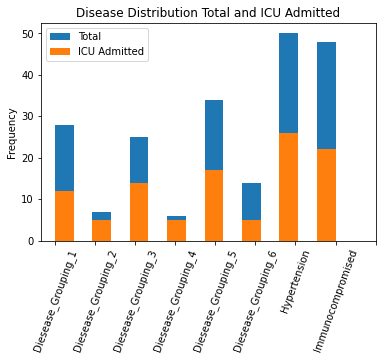

In [17]:
Diesease_Grouping_1 = final_data['DISEASE GROUPING 1'].value_counts()
Diesease_Grouping_2 = final_data['DISEASE GROUPING 2'].value_counts()
Diesease_Grouping_3 = final_data['DISEASE GROUPING 3'].value_counts()
Diesease_Grouping_4 = final_data['DISEASE GROUPING 4'].value_counts()
Diesease_Grouping_5 = final_data['DISEASE GROUPING 5'].value_counts()
Diesease_Grouping_6 = final_data['DISEASE GROUPING 6'].value_counts()
HTN_total = final_data['HTN'].value_counts()
Immunocompromised_total = final_data['IMMUNOCOMPROMISED'].value_counts()
Other_total = final_data['OTHER'].value_counts()

ICU_Diesease_Grouping_1 = ICU_Admitted_data['DISEASE GROUPING 1'].value_counts()
ICU_Diesease_Grouping_2 = ICU_Admitted_data['DISEASE GROUPING 2'].value_counts()
ICU_Diesease_Grouping_3 = ICU_Admitted_data['DISEASE GROUPING 3'].value_counts()
ICU_Diesease_Grouping_4 = ICU_Admitted_data['DISEASE GROUPING 4'].value_counts()
ICU_Diesease_Grouping_5 = ICU_Admitted_data['DISEASE GROUPING 5'].value_counts()
ICU_Diesease_Grouping_6 = ICU_Admitted_data['DISEASE GROUPING 6'].value_counts()
HTN_ICU = ICU_Admitted_data['HTN'].value_counts()
Immunocompromised_ICU = ICU_Admitted_data['IMMUNOCOMPROMISED'].value_counts()
Other_ICU = ICU_Admitted_data['OTHER'].value_counts()

x = np.array([[Diesease_Grouping_1[1],Diesease_Grouping_2[1],Diesease_Grouping_3[1],Diesease_Grouping_4[1],Diesease_Grouping_5[1],Diesease_Grouping_6[1],HTN_total[1], Immunocompromised_total[1]],[ICU_Diesease_Grouping_1[1],ICU_Diesease_Grouping_2[1],ICU_Diesease_Grouping_3[1],ICU_Diesease_Grouping_4[1],ICU_Diesease_Grouping_5[1],ICU_Diesease_Grouping_6[1],HTN_ICU[1], Immunocompromised_ICU[1]]])
a = []
c=1
for i in x[0]:
  a.extend([c]*i)
  c+=1
plt.hist(a, 15, label='Total')
b = []
c=1
for i in x[1]:
  b.extend([c]*i)
  c+=1
print(x)
plt.hist(b, 15, label='ICU Admitted')
plt.xticks([1,2,3,4,5,6,7,8,9],['Diesease_Grouping_1','Diesease_Grouping_2','Diesease_Grouping_3','Diesease_Grouping_4','Diesease_Grouping_5','Diesease_Grouping_6', 'Hypertension', 'Immunocompromised'], rotation = 70)
plt.legend()
plt.ylabel('Frequency')
plt.title('Disease Distribution Total and ICU Admitted')
plt.show()

,AGE_ABOVE65,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,ICU
AGE_PERCENTIL_70th,0.402675,0.081684,-0.052838,0.138639,0.189637,0.053387,0.029902,0.116127,0.154684,0.049643,0.033136,0.033136,0.033136,0.033136,NaN,-0.002242,-0.002242,-0.002242,-0.002242,NaN,0.055450,0.055450,0.055450,0.055450,NaN,-0.013313,-0.013313,-0.0133

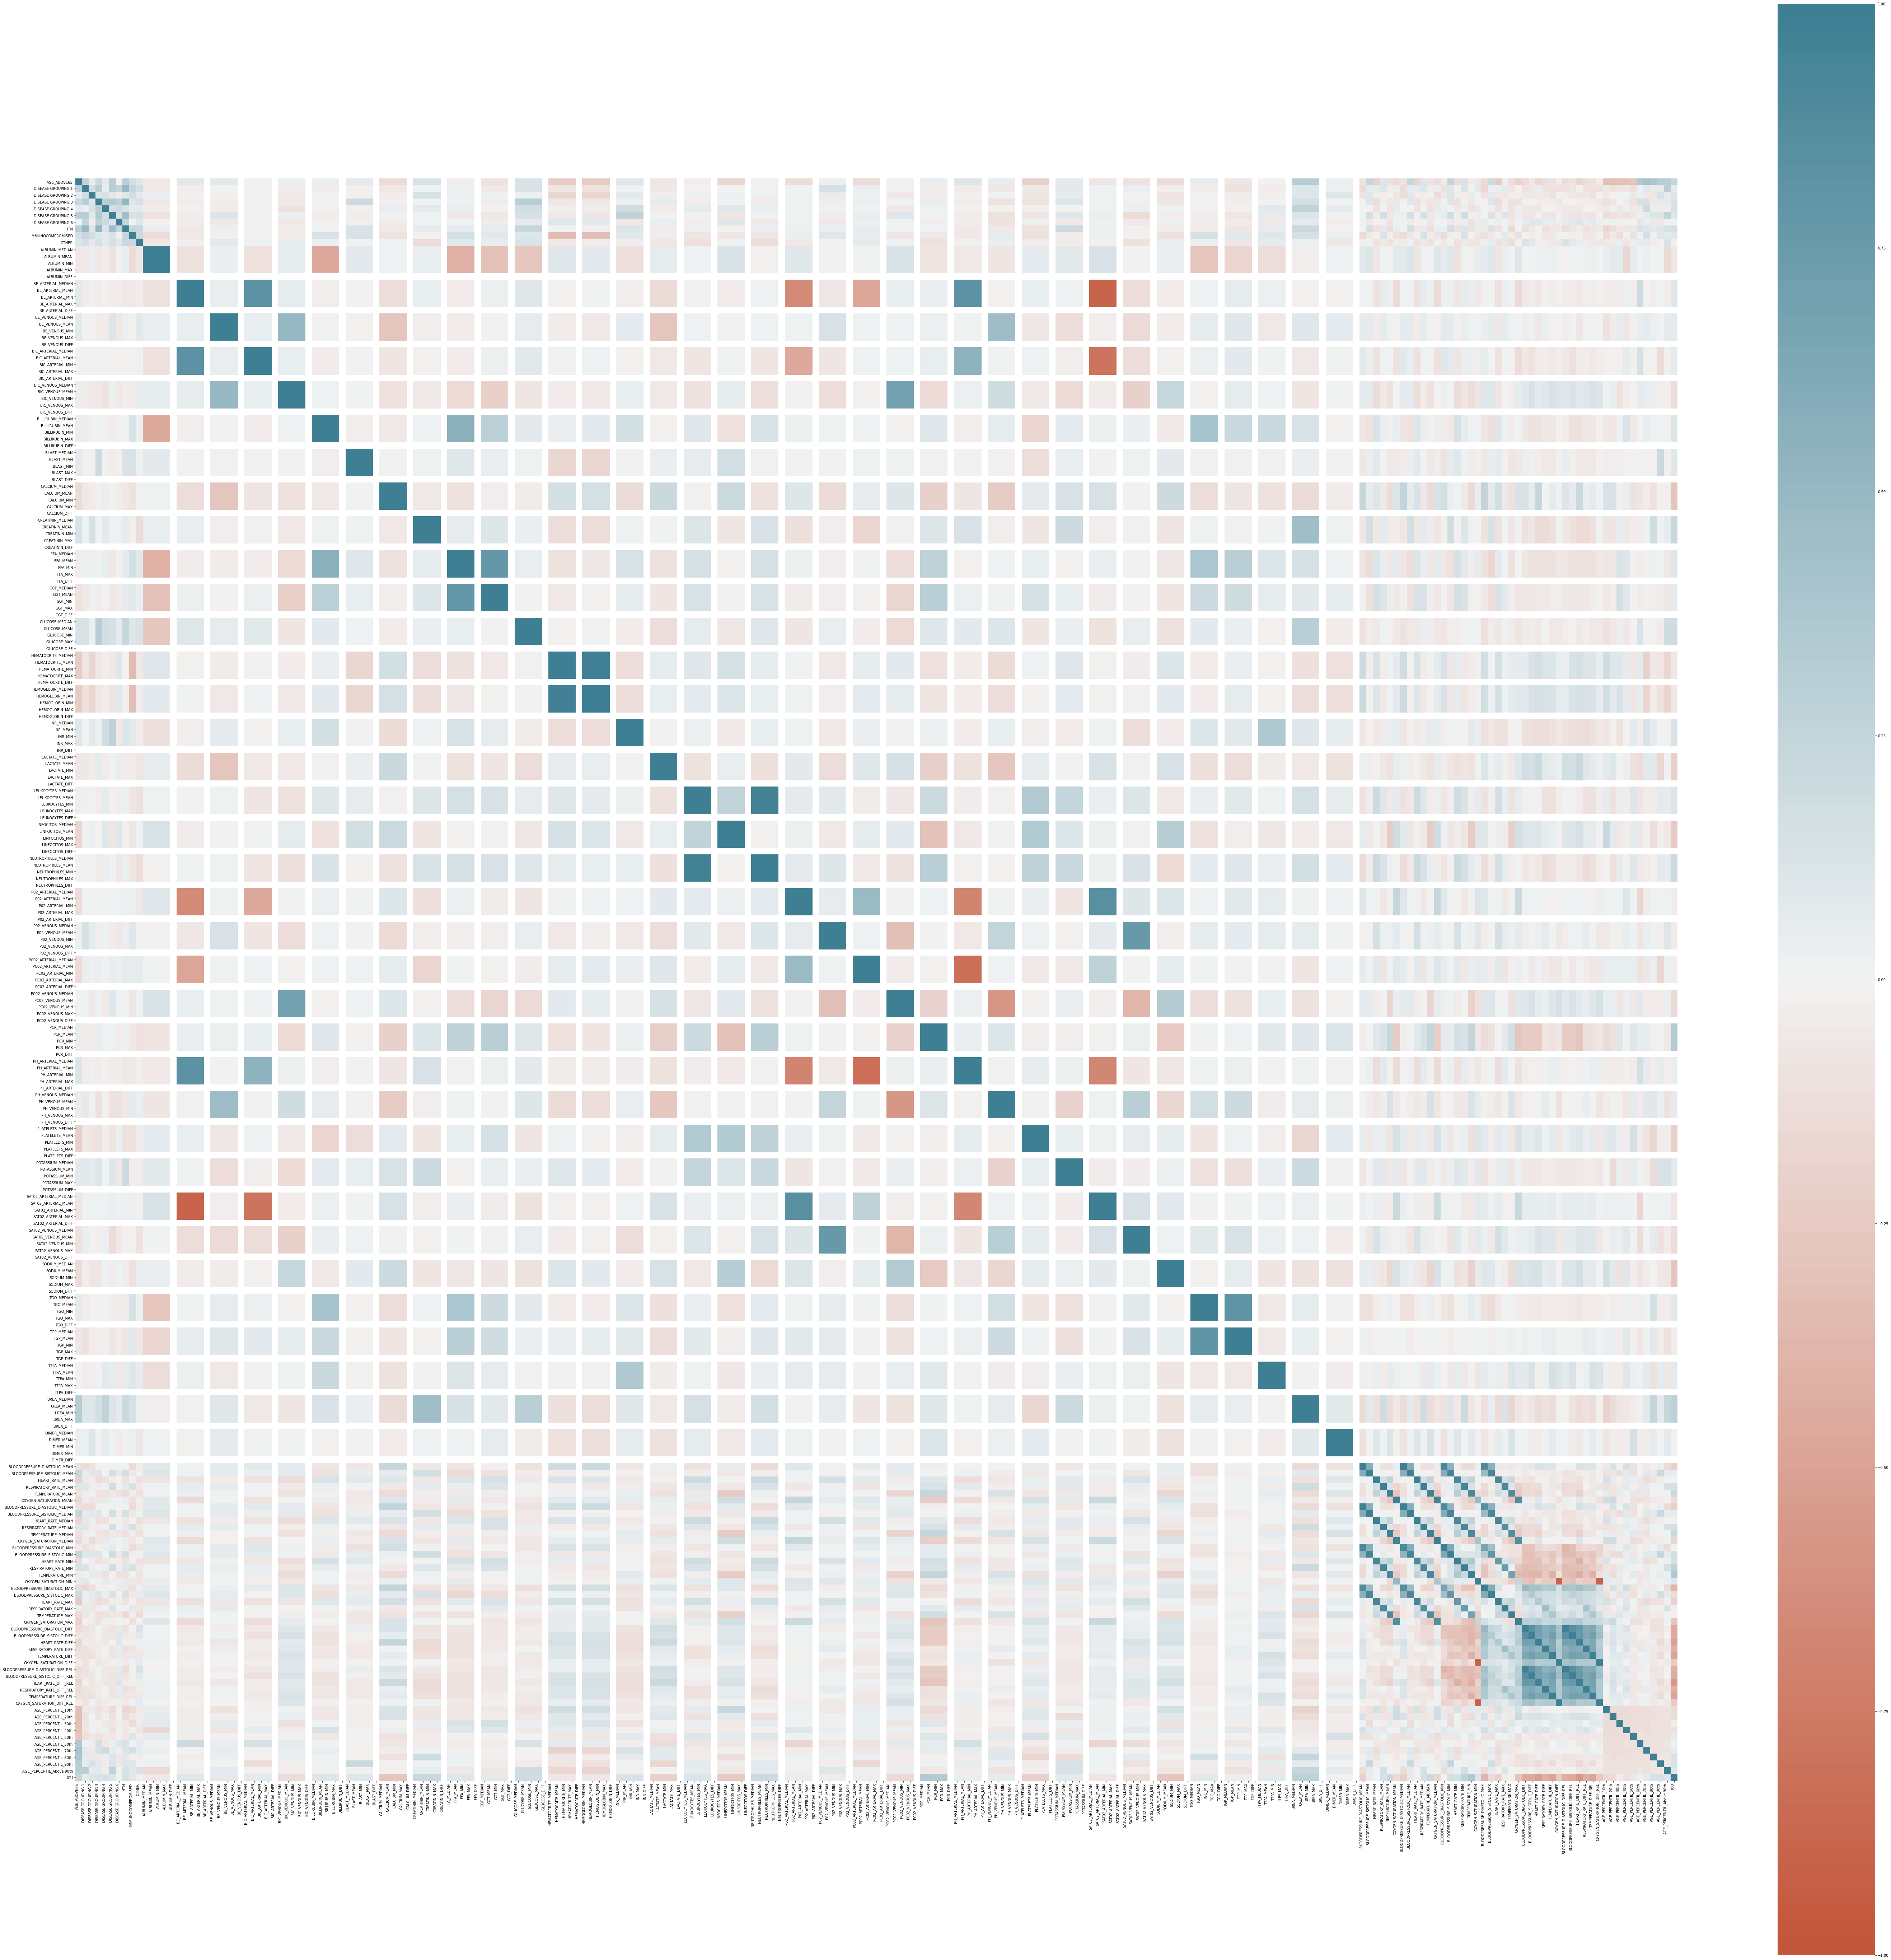

In [18]:
import seaborn as sns
corr = final_data.corr()
corr.shape
plt.subplots(figsize=(100,100))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
corr.tail()


In [19]:
corr.shape
ICU_corr = corr.iloc[236]
ICU_corr.describe()


count    201.000000
mean      -0.007311
std        0.195205
min       -0.561299
25%       -0.126787
50%        0.044200
75%        0.103800
max        1.000000
Name: ICU, dtype: float64

In [20]:
ICU_corr = np.array(ICU_corr)
selection = []
for i in ICU_corr:
  if(i):
    if(i>0.11):
      selection.append(True)
    elif(i<-0.12):
      selection.append(True)
    else:
      selection.append(False)
  else:
    selection.append(False)

print(len(selection), selection.count(True))
selection = np.array(selection)
selected_final_data = final_data.loc[:, selection]
selected_final_data.head()

selected_final_data = selected_final_data[['AGE_ABOVE65', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4',
                                           'HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN' , 'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN',
                                           'LACTATE_MEAN', 'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN', 'PC02_VENOUS_MEAN',
                                           'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN', 'SODIUM_MEAN', 'UREA_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
                                           'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN', 'BLOODPRESSURE_SISTOLIC_MIN',
                                           'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN', 'TEMPERATURE_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MAX',
                                           'HEART_RATE_MAX', 'OXYGEN_SATURATION_MAX', 'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF', 
                                           'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 
                                           'AGE_PERCENTIL_10th', 'AGE_PERCENTIL_20th', 'AGE_PERCENTIL_80th', 'AGE_PERCENTIL_90th', 'ICU']]

print(selected_final_data.shape)
selected_final_data.head()


237 98
(293, 43)


,AGE_ABOVE65,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,HTN,BIC_VENOUS_MEAN,CALCIUM_MEAN,CREATININ_MEAN,GLUCOSE_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PLATELETS_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,UREA_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,ICU
0,1.0,0.0,0.0,0.0,0.0,-0.317073,0.183673,-0.868365,-0.891993,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.754601,-0.875236,-0.540721,0.345679,-0.028571,-0.836145,0.086420,-0.593220,-0.285714,0.736842,0.000000,-0.162393,-0.500000,0.208791,-0.247863,-0.459459,-0.432836,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.912243,-0.780261,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.754601,-0.939887,-0.399199,0.345679,0.085714,-0.836145,-0.551183,-0.683145,0.357143,0.867507,-0.587500,-0.145299,-0.678571,0.604396,-0.504274,-0.627027,0.000000,1.000000,-0.626087,-0.613497,-0.572519,-0.852941,-1.000000,-0.878788,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,-0.317073,0.326531,-0.968861,-0.891993,-0.959849,-0.828421,-0.729239,-0.836100,-0.784714,-0.779141,-0.503592,-0.564753,0.580247,0.200000,-0.937349,-0.132620,-0.506215,-0.119762,0.652398,-0.329167,-0.435897,-0.547619,0.216117,-0.247863,-0.506306,-0.263682,0.754386,-0.692754,-0.730061,-0.582697,-0.784314,-0.682540,-0.723906,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.913659,-0.851024,-0.959849,1.000000,-0.702202,-0.641079,-0.812725,-0.754601,-0.990926,-0.457944,0.345679,0.142857,-0.903614,0.236838,-0.539451,0.189142,0.852390,0.000000,0.048433,-0.500000,0.362637,-0.076923,-0.293694,0.019900,0.912281,-0.826087,-0.811861,-0.725191,-0.901961,-0.761905,-0.959596,1.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.891012,-0.891993,-0.959849,1.000000,-0.706450,-0.340249,-0.846339,-0.754601,-0.997732,-0.292390,0.345679,0.085714,-0.884337,-0.078189,-0.495292,-0.137566,0.835283,-0.291667,-0.418803,-0.404762,0.252747,-0.282051,-0.553153,-0.482587,0.894737,-0.843478,-0.820041,-0.821883,-0.980392,-0.904762,-0.966330,1.0,0.0,0.0,0.0,0.0


,AGE_ABOVE65,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,HTN,BIC_VENOUS_MEAN,CALCIUM_MEAN,CREATININ_MEAN,GLUCOSE_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PLATELETS_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,UREA_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,ICU
AGE_PERCENTIL_10th,-0.313916,-0.058553,-0.114311,-0.054115,-0.169772,0.013096,0.131271,-0.074361,-0.107257,-0.078865,0.074443,0.054177,0.219045,-0.005714,0.046349,-0.148719,0.084417,-0.013667,0.157883,-0.201817,-0.047245,-0.111062,0.060691,0.181119,-0.084997,0.122856,-0.084227,0.073454,-0.054504,-0.115735,0.156086,0.152179,-0.013078,-0.050120,0.050871,-0.002497,-0.022218,-0.006817,1.000000,-0.144480,-0.116793,-0.101302,-0.149620
AGE_PERCENTIL_20th,-0.323780,0.006130,-0.081539,0.015912,-0.121100,0.039324,0.130802,-0.072781,-0.056432,-0.020764,0.103174,-0.096160,0.076510,-0.117150,0.038461,-0.098218,0.101462,0.044953,0.084859,-0.137249,0.126126,-0.077020,-0.082433,0.190544,-0.117213,0.011360,-0.109793,-0.119135,0.142613,-0.039946,0.096577,0.200298,0.107792,0.117468,0.125407,0.110745,0.083120,0.043650,-0.144480,1.000000,-0.120463,-0.104485,-0.140198
AGE_PERCENTIL_80th,0.372051,-0.048820,-0.052347,0.039624,0.081773,0.031392,-0.106084,0.187437,-0.006491,0.066156,0.072293,-0.045179,-0.124717,-0.017195,-0.038268,-0.008421,-0.176491,0.062060,-0.004862,0.246949,-0.010905,0.008452,-0.009846,-0.060254,0.073879,-0.095074,0.017877,0.015329,-0.057432,0.036275,-0.112635,-0.093839,-0.092799,-0.056737,-0.027386,-0.048452,-0.061946,-0.053039,-0.116793,-0.120463,1.000000,-0.084463,0.117203
AGE_PERCENTIL_90th,0.322705,0.134898,0.062662,-0.039135,0.093065,-0.023979,-0.008451,0.011321,-0.046688,0.003333,-0.157023,0.067807,-0.024487,0.068433,-0.038205,0.011468,-0.031250,-0.093800,-0.052278,0.065191,0.035194,0.020020,0.006909,-0.033732,0.227708,0.005969,0.028998,0.042049,-0.006645,0.173577,-0.087677,-0.093220,-0.090489,-0.078546,-0.137506,-0.075868,-0.124175,-0.028338,-0.101302,-0.104485,-0.084463,1.000000,0.136393
ICU,0.240516,0.116123,0.128431,0.143218,0.152904,-0.128091,-0.281260,0.219298,0.186633,0.125135,-0.206652,0.116605,-0.257798,0.196802,-0.151272,0.342681,-0.205424,-0.126787,-0.270175,0.284436,-0.207844,0.145838,0.211525,-0.142736,0.170446,0.154358,0.268190,0.365030,-0.374781,-0.122936,-0.202084,-0.285522,-0.460225,-0.453095,-0.521195,-0.404924,-0.486424,-0.232002,-0.149620,-0.140198,0.117203,0.136393,1.000000


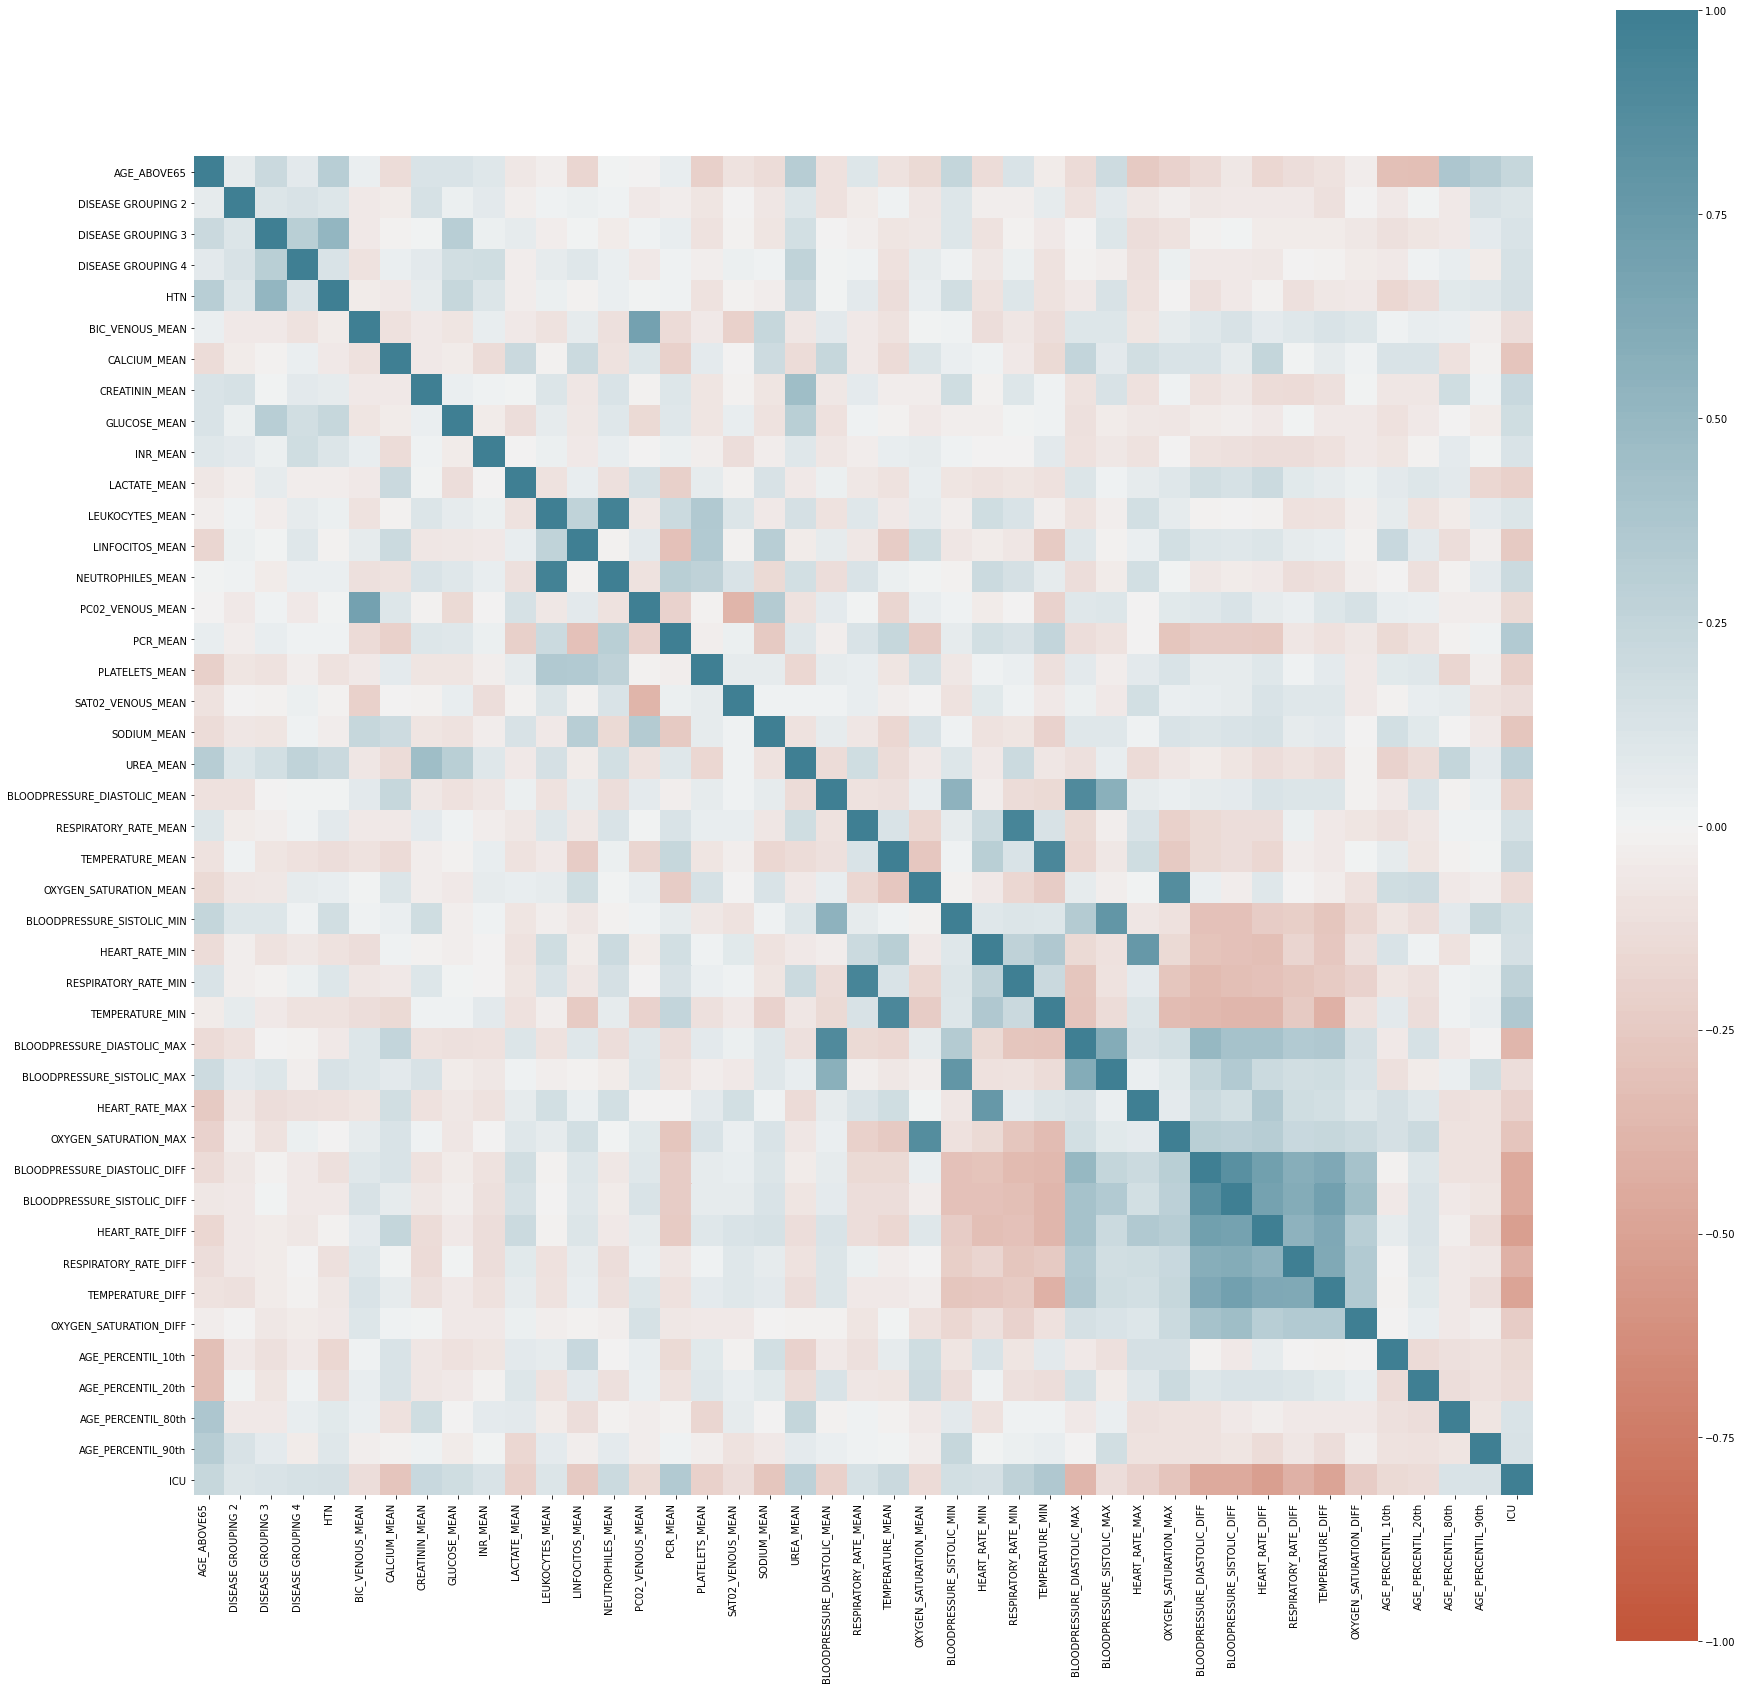

In [21]:
corr = selected_final_data.corr()
corr.shape
plt.subplots(figsize=(30,30))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);
corr.tail()

In [22]:
selected_final_data.columns

Index(['AGE_ABOVE65', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN',
       'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN', 'LACTATE_MEAN',
       'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN',
       'PC02_VENOUS_MEAN', 'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'UREA_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX',
       'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'OXYGEN_SATURATION_MAX',
       'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF',
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF',
       'OXYGEN_SATURATION_DIFF', 'AGE_PERCENTIL_10th', 'AGE_PERCENTIL_20th',
       'AGE_PERCENTIL_80th', 'AGE_PERCENTIL_90th', 'ICU'],
      dtype=

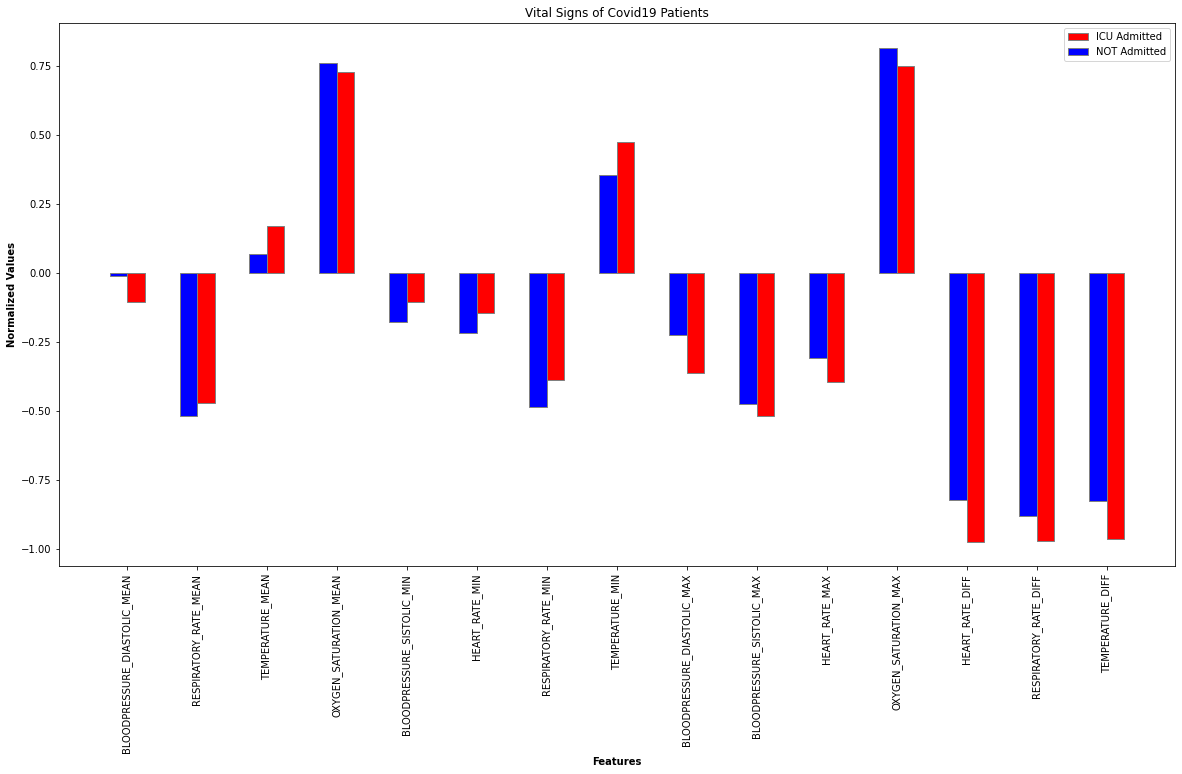

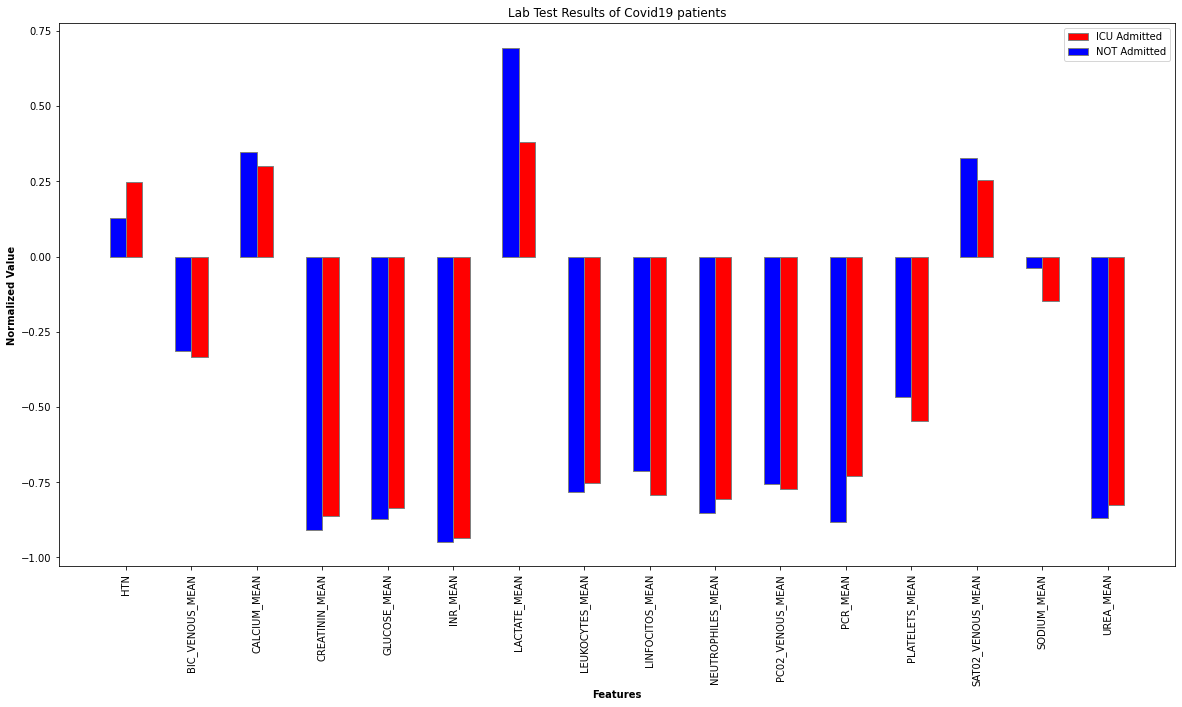

In [23]:
Non_ICU_Admitted_data = selected_final_data[selected_final_data['ICU']==0]
ICU_Admitted_data = selected_final_data[selected_final_data['ICU']==1]

Vital_Non_ICU_Admitted_data = Non_ICU_Admitted_data[['BLOODPRESSURE_DIASTOLIC_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX',
       'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'OXYGEN_SATURATION_MAX',
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF']]

Vital_ICU_Admitted_data = ICU_Admitted_data[['BLOODPRESSURE_DIASTOLIC_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX',
       'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'OXYGEN_SATURATION_MAX',
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF']]


Lab_Non_ICU_Admitted_data = Non_ICU_Admitted_data[['HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN',
       'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN', 'LACTATE_MEAN',
       'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN',
       'PC02_VENOUS_MEAN', 'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'UREA_MEAN']]
Lab_ICU_Admitted_data = ICU_Admitted_data[['HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN',
       'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN', 'LACTATE_MEAN',
       'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN',
       'PC02_VENOUS_MEAN', 'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'UREA_MEAN']]


# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10)) 
   
vital_non_ICU = np.array(Vital_Non_ICU_Admitted_data.mean(axis=0)) 
vital_ICU = np.array(Vital_ICU_Admitted_data.mean(axis=0)) 
   
# Set position of bar on X axis 
br1 = np.arange(len(vital_ICU)) + (barWidth*0.5)
br2 = [x + barWidth for x in br1]  
   
# Make the plot 
plt.bar(br2, vital_ICU, color ='r', width = barWidth, edgecolor ='grey', label ='ICU Admitted') 
plt.bar(br1, vital_non_ICU, color ='b', width = barWidth, edgecolor ='grey', label ='NOT Admitted') 

   
plt.xlabel('Features', fontweight ='bold') 
plt.ylabel('Normalized Values', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(vital_ICU))], ['BLOODPRESSURE_DIASTOLIC_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX',
       'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'OXYGEN_SATURATION_MAX',
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF'], rotation = 90) 

plt.legend()
plt.title("Vital Signs of Covid19 Patients")
plt.show()


# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10)) 
   
lab_non_ICU = np.array(Lab_Non_ICU_Admitted_data.mean(axis=0)) 
lab_ICU = np.array(Lab_ICU_Admitted_data.mean(axis=0)) 
   
# Set position of bar on X axis 
br1 = np.arange(len(lab_ICU)) + (barWidth*0.5)
br2 = [x + barWidth for x in br1]  
   
# Make the plot 
plt.bar(br2, lab_ICU, color ='r', width = barWidth, edgecolor ='grey', label ='ICU Admitted') 
plt.bar(br1, lab_non_ICU, color ='b', width = barWidth, edgecolor ='grey', label ='NOT Admitted') 

   
plt.xlabel('Features', fontweight ='bold') 
plt.ylabel('Normalized Value', fontweight ='bold') 
plt.legend()
plt.xticks([r + barWidth for r in range(len(lab_ICU))], ['HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN',
       'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN', 'LACTATE_MEAN',
       'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN',
       'PC02_VENOUS_MEAN', 'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'UREA_MEAN'], rotation = 90) 
plt.title("Lab Test Results of Covid19 patients")
plt.show()

(293, 42)
(293, 1)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
pca  (293, 42)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


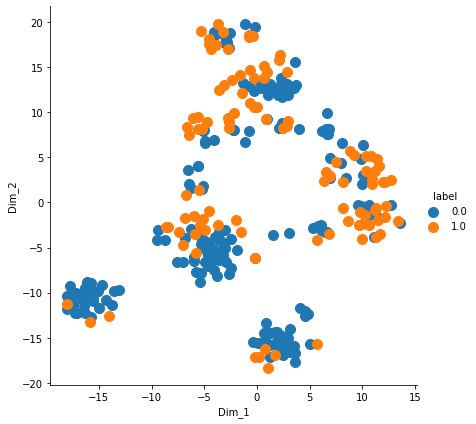

In [24]:
X_data = np.array(selected_final_data.drop(['ICU'], axis = 1))
Y_data = np.array(selected_final_data[['ICU']])
print(X_data.shape)
print(Y_data.shape)
from sklearn.decomposition import PCA 

labels = []
for i in Y_data:
  if(i[0]==0):
    labels.append(0)
  else:
    labels.append(1)
print(X_data)
Y_data = np.array(labels)

#pca = PCA(0.80)
#X_data = pca.fit_transform(X_data)
print("pca ", X_data.shape)
model = TSNE(n_components = 2, random_state = 0) 
  
tsne_data = model.fit_transform(X_data) 


# creating a new data frame which 
# help us in ploting the result data 
tsne_data = np.vstack((tsne_data.T, Y_data)).T 
tsne_df = pd.DataFrame(data = tsne_data, 
     columns =("Dim_1", "Dim_2","label")) 
  
# Ploting the result of tsne 
sns.FacetGrid(tsne_df, hue ="label", size = 6).map( 
       plt.scatter, 'Dim_1', 'Dim_2', s = 100).add_legend() 
  
plt.show() 


In [25]:
selected_final_data.head()


,AGE_ABOVE65,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,HTN,BIC_VENOUS_MEAN,CALCIUM_MEAN,CREATININ_MEAN,GLUCOSE_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PLATELETS_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,UREA_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,ICU
0,1.0,0.0,0.0,0.0,0.0,-0.317073,0.183673,-0.868365,-0.891993,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.754601,-0.875236,-0.540721,0.345679,-0.028571,-0.836145,0.086420,-0.593220,-0.285714,0.736842,0.000000,-0.162393,-0.500000,0.208791,-0.247863,-0.459459,-0.432836,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.912243,-0.780261,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.754601,-0.939887,-0.399199,0.345679,0.085714,-0.836145,-0.551183,-0.683145,0.357143,0.867507,-0.587500,-0.145299,-0.678571,0.604396,-0.504274,-0.627027,0.000000,1.000000,-0.626087,-0.613497,-0.572519,-0.852941,-1.000000,-0.878788,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,-0.317073,0.326531,-0.968861,-0.891993,-0.959849,-0.828421,-0.729239,-0.836100,-0.784714,-0.779141,-0.503592,-0.564753,0.580247,0.200000,-0.937349,-0.132620,-0.506215,-0.119762,0.652398,-0.329167,-0.435897,-0.547619,0.216117,-0.247863,-0.506306,-0.263682,0.754386,-0.692754,-0.730061,-0.582697,-0.784314,-0.682540,-0.723906,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.913659,-0.851024,-0.959849,1.000000,-0.702202,-0.641079,-0.812725,-0.754601,-0.990926,-0.457944,0.345679,0.142857,-0.903614,0.236838,-0.539451,0.189142,0.852390,0.000000,0.048433,-0.500000,0.362637,-0.076923,-0.293694,0.019900,0.912281,-0.826087,-0.811861,-0.725191,-0.901961,-0.761905,-0.959596,1.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.891012,-0.891993,-0.959849,1.000000,-0.706450,-0.340249,-0.846339,-0.754601,-0.997732,-0.292390,0.345679,0.085714,-0.884337,-0.078189,-0.495292,-0.137566,0.835283,-0.291667,-0.418803,-0.404762,0.252747,-0.282051,-0.553153,-0.482587,0.894737,-0.843478,-0.820041,-0.821883,-0.980392,-0.904762,-0.966330,1.0,0.0,0.0,0.0,0.0


In [26]:
print(X_data)
print(Y_data)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1
 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0
 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0]


## Training and Testing using various classifiers


Importing Libraries

In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 
from sklearn.metrics import log_loss
from sklearn import tree
import graphviz
from sklearn.neural_network import MLPClassifier

Shape of Datasets

In [33]:
print(X_data.shape)
print(Y_data.shape)

(293, 42)
(293,)


In [34]:
def ass(y_true,y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  accuracy=(tp+tn)/(tp+fp+fn+tn)
  specificity = tn/(tn+fp)
  sensitivity=tp/(tp+fn)
  print("Accuracy:",accuracy*100)
  print("Sensitivity:",sensitivity*100)
  print("Specificity:",specificity*100)
  print("ROC_AUC_Score:",roc_auc_score(y_true, y_pred)*100)
  

Splitting Data into Training Data and Testing Data

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=1)

Performing Logistic Regression with Cross Validation Estimator

In [36]:
lgc=make_pipeline(LogisticRegressionCV(cv=5,random_state=1,max_iter=5000))
lgc.fit(X_train, Y_train)
y_pred=lgc.predict(X_test)
ass(Y_test,y_pred)

Accuracy: 84.0909090909091
Sensitivity: 66.66666666666666
Specificity: 91.80327868852459
ROC_AUC_Score: 79.23497267759562


Performing Gaussian Naive Bayes 

In [37]:
gnb=make_pipeline(GaussianNB())
gnb.fit(X_train,Y_train)
y_pred=gnb.predict(X_test)
ass(Y_test,y_pred)

Accuracy: 82.95454545454545
Sensitivity: 66.66666666666666
Specificity: 90.1639344262295
ROC_AUC_Score: 78.41530054644808


Finding Optimal Depth (SGD Classifier)

In [38]:
mx=-1
ri=-1
for i in range(1,10000):
  sgd= make_pipeline(SGDClassifier(random_state=i))
  sgd.fit(X_train,Y_train)
  pmx=mx
  mx=max(mx,sgd.score(X_test,Y_test))
  if(pmx!=mx):
    ri=i
print(ri)

285


Performing SGD classifier with optimal Depth

In [39]:
sgd= make_pipeline(SGDClassifier(random_state=ri))
sgd.fit(X_train,Y_train)
y_pred=sgd.predict(X_test)
ass(Y_test,y_pred)

Accuracy: 88.63636363636364
Sensitivity: 74.07407407407408
Specificity: 95.08196721311475
ROC_AUC_Score: 84.5780206435944


Performing SVM ( Supoort Vector Machine ) classification on the given data

In [40]:
SVM_object = make_pipeline(svm.SVC(kernel='linear'))
SVM_object.fit(X_train,Y_train)
y_pred=SVM_object.predict(X_test)
ass(Y_test,y_pred)


Accuracy: 85.22727272727273
Sensitivity: 66.66666666666666
Specificity: 93.44262295081968
ROC_AUC_Score: 80.05464480874316


Performing Decision tree classification


In [41]:
DT_object=tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,max_leaf_nodes=10)
DT_object.fit(X_train,Y_train)
y_pred=DT_object.predict(X_test)
ass(Y_test,y_pred)

Accuracy: 93.18181818181817
Sensitivity: 92.5925925925926
Specificity: 93.44262295081968
ROC_AUC_Score: 93.01760777170614


In [42]:
from sklearn import tree
import graphviz
text_representation = tree.export_text(DT_object)
print(text_representation)


|--- feature_34 <= -0.91
|   |--- feature_12 <= -0.77
|   |   |--- feature_16 <= -0.49
|   |   |   |--- class: 1
|   |   |--- feature_16 >  -0.49
|   |   |   |--- class: 1
|   |--- feature_12 >  -0.77
|   |   |--- feature_8 <= -0.88
|   |   |   |--- feature_17 <= -0.10
|   |   |   |   |--- class: 1
|   |   |   |--- feature_17 >  -0.10
|   |   |   |   |--- class: 0
|   |   |--- feature_8 >  -0.88
|   |   |   |--- class: 1
|--- feature_34 >  -0.91
|   |--- feature_12 <= -0.84
|   |   |--- feature_36 <= -0.90
|   |   |   |--- class: 1
|   |   |--- feature_36 >  -0.90
|   |   |   |--- feature_21 <= -0.46
|   |   |   |   |--- class: 0
|   |   |   |--- feature_21 >  -0.46
|   |   |   |   |--- class: 1
|   |--- feature_12 >  -0.84
|   |   |--- feature_27 <= 0.07
|   |   |   |--- class: 1
|   |   |--- feature_27 >  0.07
|   |   |   |--- class: 0



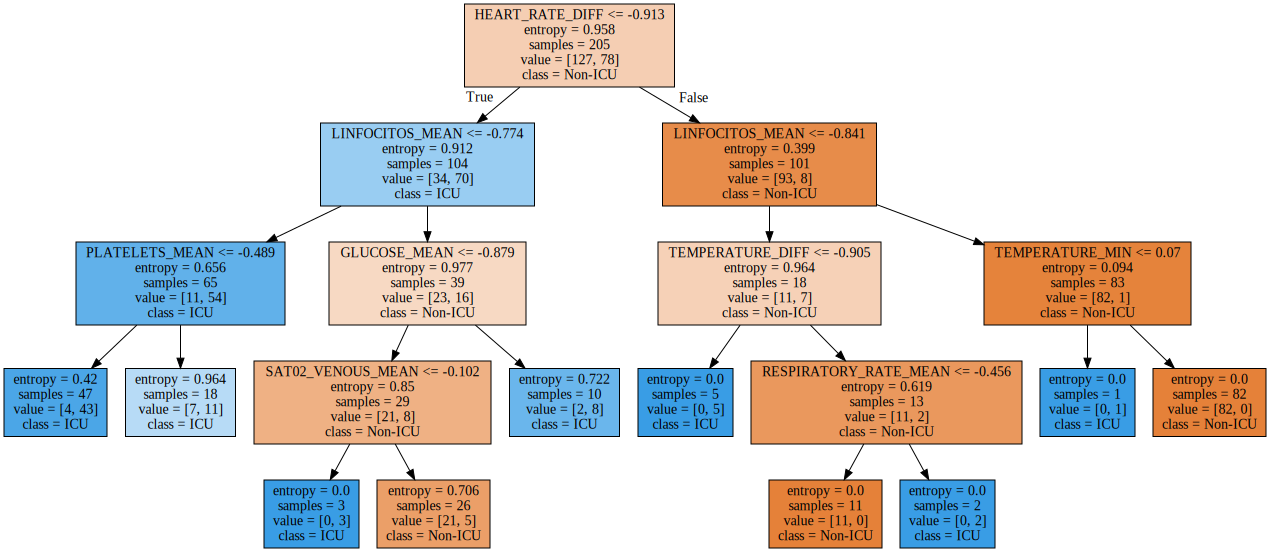

In [43]:
features=['AGE_ABOVE65', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN',
       'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN', 'LACTATE_MEAN',
       'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN',
       'PC02_VENOUS_MEAN', 'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'UREA_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX',
       'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'OXYGEN_SATURATION_MAX',
       'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF',
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF',
       'OXYGEN_SATURATION_DIFF', 'AGE_PERCENTIL_10th', 'AGE_PERCENTIL_20th',
       'AGE_PERCENTIL_80th', 'AGE_PERCENTIL_90th']
classes=['Non-ICU','ICU']
dot_data = tree.export_graphviz(DT_object, out_file=None, 
                                feature_names=features,  
                                class_names=classes,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

Performing K-Nearest Neighbour Classifier 


In [44]:
KNN_object=make_pipeline(KNeighborsClassifier(n_neighbors=25,p=1))
KNN_object.fit(X_train,Y_train)
y_pred=KNN_object.predict(X_test)
ass(Y_test,y_pred)

Accuracy: 82.95454545454545
Sensitivity: 51.85185185185185
Specificity: 96.72131147540983
ROC_AUC_Score: 74.28658166363084


Performing Random Forest Classifier

In [45]:
RF_object = RandomForestClassifier(criterion='gini',random_state=23,max_depth=6,bootstrap=True)
RF_object.fit(X_train,Y_train)
y_pred=RF_object.predict(X_test)
ass(Y_test,y_pred)

Accuracy: 93.18181818181817
Sensitivity: 88.88888888888889
Specificity: 95.08196721311475
ROC_AUC_Score: 91.98542805100182


##Performing Grid Search on Various ML Algorithm

Grid Search on Decision Tree

In [46]:
param_grid = {'criterion':['entropy','gini'],'max_depth':np.arange(1,30),'max_leaf_nodes':np.arange(3,20),'random_state':[1,2]}
GS_DT=GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
GS_DT.fit(X_train,Y_train)
GS_DT.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_leaf_nodes': 13,
 'random_state': 1}

In [47]:
GS_DT.score(X_test,Y_test)

0.9318181818181818

In [48]:
dt_train_score=[]
dt_test_score=[]
for i in np.arange(1, 30):
  param_grid = {'criterion':['entropy','gini'],'max_depth': [i],'max_leaf_nodes':np.arange(3,20),'random_state':[1,2]}
  GS_DT=GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
  GS_DT.fit(X_train,Y_train)
  y_train_pred=GS_DT.predict(X_train)
  y_pred=GS_DT.predict(X_test)
  dt_train_score.append(log_loss(Y_train,y_train_pred))
  dt_test_score.append(log_loss(Y_test,y_pred))

[]

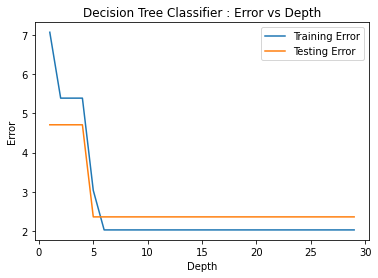

In [49]:
plt.title("Decision Tree Classifier : Error vs Depth")
plt.xlabel("Depth")
plt.ylabel("Error")
plt.plot(np.arange(1,30),dt_train_score,label="Training Error")
plt.plot(np.arange(1,30),dt_test_score,label="Testing Error")
plt.legend()
plt.plot()

 Best kernel Performance using Grid Search

In [50]:
param_grid = {'kernel':['linear','poly','sigmoid','rbf'],'gamma':['scale','auto'],'random_state':[1,2,3]}
GS_SVM=GridSearchCV(svm.SVC(), param_grid,cv=5)
GS_SVM.fit(X_train,Y_train)
GS_SVM.best_params_

{'gamma': 'scale', 'kernel': 'linear', 'random_state': 1}

In [51]:
GS_SVM.score(X_test,Y_test)

0.8522727272727273

In [52]:
dt_train_score=[]
dt_test_score=[]
for i in ['linear','poly','sigmoid','rbf']:
  param_grid = {'kernel':[i],'gamma':['scale','auto'],'random_state':[1,2,3]}
  GS_SVM=GridSearchCV(svm.SVC(), param_grid,cv=5)
  GS_SVM.fit(X_train,Y_train)
  y_train_pred=GS_SVM.predict(X_train)
  y_pred=GS_SVM.predict(X_test)
  dt_train_score.append(log_loss(Y_train,y_train_pred))
  dt_test_score.append(log_loss(Y_test,y_pred))

[]

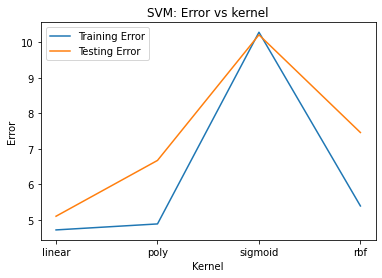

In [53]:
plt.title("SVM: Error vs kernel")
plt.xlabel("Kernel")
plt.ylabel("Error")
plt.plot(['linear','poly','sigmoid','rbf'],dt_train_score,label="Training Error")
plt.plot(['linear','poly','sigmoid','rbf'],dt_test_score,label="Testing Error")
plt.legend()
plt.plot()

Grid Search on K nearest neighbour

In [54]:
param_grid = {'n_neighbors':[10,15,20,25,30,35,40],'leaf_size':np.arange(3,20),'p':[1,2]}
GS_KNN=GridSearchCV(KNeighborsClassifier(), param_grid,cv=5)
GS_KNN.fit(X_train,Y_train)
GS_KNN.best_params_

{'leaf_size': 3, 'n_neighbors': 15, 'p': 1}

In [55]:
GS_KNN.score(X_test,Y_test)

0.7954545454545454

In [56]:
knn_train_score=[]
knn_test_score=[]
for i in [10,15,20,25,30,35,40]:
  param_grid = {'n_neighbors': [i],'leaf_size':np.arange(3,20),'p':[1,2]}
  GS_KNN=GridSearchCV(KNeighborsClassifier(), param_grid,cv=5)
  GS_KNN.fit(X_train,Y_train)
  y_train_pred=GS_KNN.predict(X_train)
  y_pred=GS_KNN.predict(X_test)
  knn_train_score.append(log_loss(Y_train,y_train_pred))
  knn_test_score.append(log_loss(Y_test,y_pred))

[]

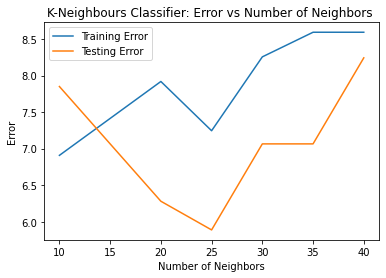

In [57]:
plt.title("K-Neighbours Classifier: Error vs Number of Neighbors ")
plt.xlabel("Number of Neighbors")
plt.ylabel("Error")
plt.plot([10,15,20,25,30,35,40],knn_train_score,label="Training Error")
plt.plot([10,15,20,25,30,35,40],knn_test_score,label="Testing Error")
plt.legend()
plt.plot()

Grid search on Random Forest Classifier

In [58]:
param_grid = {'criterion':['gini','entropy'],'max_depth': [6],'random_state':[23]}
GS_RF=GridSearchCV(RandomForestClassifier(), param_grid,cv=5)
GS_RF.fit(X_train,Y_train)
GS_RF.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'random_state': 23}

In [59]:
GS_RF.score(X_test,Y_test)

0.8863636363636364

In [60]:
rf_train_score=[]
rf_test_score=[]
for i in np.arange(1, 30):
  param_grid = {'criterion':['gini','entropy'],'max_depth': [i],'random_state':[23]}
  GS_RF=GridSearchCV(RandomForestClassifier(), param_grid,cv=5)
  GS_RF.fit(X_train,Y_train)
  y_train_pred=GS_RF.predict(X_train)
  y_pred=GS_RF.predict(X_test)
  rf_train_score.append(log_loss(Y_train,y_train_pred))
  rf_test_score.append(log_loss(Y_test,y_pred))

[]

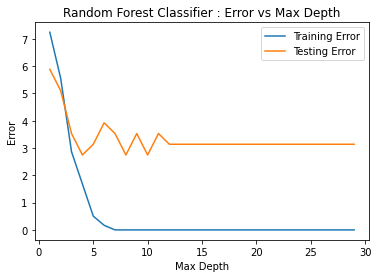

In [61]:
plt.title("Random Forest Classifier : Error vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Error")
plt.plot(np.arange(1,30),rf_train_score,label="Training Error")
plt.plot(np.arange(1,30),rf_test_score,label="Testing Error")
plt.legend()
plt.plot()

Training model with different activation functions and finding model with best accuracy

In [73]:
best=1
acc=-1
for a in ["identity", "logistic", "tanh", "relu"]:
    model = MLPClassifier(activation=a,max_iter=10000, batch_size=64,alpha=0.1,random_state=1).fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print(a)
    ass(Y_test,y_pred)
    score = model.score(X_test,Y_test)
    if score>acc:
      acc=score
      best = a
    #print(a," - ",model.score(X_test,Y_test))
print(best,acc)

identity
Accuracy: 84.0909090909091
Sensitivity: 62.96296296296296
Specificity: 93.44262295081968
ROC_AUC_Score: 78.20279295689133
logistic
Accuracy: 81.81818181818183
Sensitivity: 66.66666666666666
Specificity: 88.52459016393442
ROC_AUC_Score: 77.59562841530054
tanh
Accuracy: 84.0909090909091
Sensitivity: 62.96296296296296
Specificity: 93.44262295081968
ROC_AUC_Score: 78.20279295689133
relu
Accuracy: 82.95454545454545
Sensitivity: 70.37037037037037
Specificity: 88.52459016393442
ROC_AUC_Score: 79.44748026715239
identity 0.8409090909090909


Performing Grid search on the model we got from the above

In [74]:
rf_train_score=[]
rf_test_score=[]
a=[0.001,0.01,0.1]
for i in range(len(a)):
  param_grid = {'activation':[best],'max_iter': [10000],'batch_size':[64],'alpha':[0.1],'learning_rate_init':[a[i]],'random_state':[1]}
  GS=GridSearchCV(MLPClassifier(), param_grid)
  GS.fit(X_train,Y_train)
  y_train_pred=GS.predict(X_train)
  y_pred=GS.predict(X_test)
  rf_train_score.append(log_loss(Y_train,y_train_pred))
  rf_test_score.append(log_loss(Y_test,y_pred))

[]

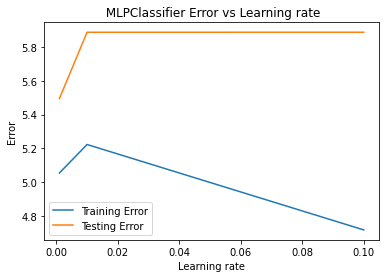

In [75]:
plt.title(" MLPClassifier Error vs Learning rate")
plt.xlabel("Learning rate")
plt.ylabel("Error")
plt.plot([0.001,0.01,0.1],rf_train_score,label="Training Error")
plt.plot([0.001,0.01,0.1],rf_test_score,label="Testing Error")
plt.legend()
plt.plot()